# Clustering-2: Hierarchical Clustering

## import Modules

In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

## Generating Data

We randomly generate 2 clusters (each with 50 points).

(100, 2)


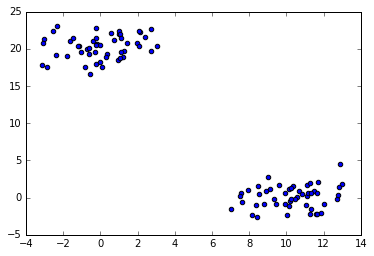

In [2]:
np.random.seed(42)
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 3]], size=[50,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 3]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)  # 100 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

## Hierarchical Clustering - Single Linkage

In [3]:
Z = linkage(X, 'single')
print(Z.shape)

(99, 4)


```Z[i]``` will tell us which clusters were merged in the i-th iteration. The format is ```[idx1, idx2, dist, sample_count]```. For example:

In [4]:
print(Z[0])

[ 66.       91.        0.02128   2.     ]


In the first iteration, the algorithm decide to merge points with indics 66 and 91, as they only had a distance of 0.02128. This created a cluster with a total of 2 samples.

Let's see the two points in the figure

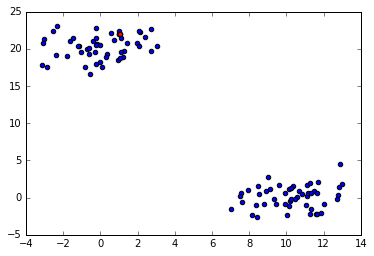

In [5]:
idxs = [66, 91]
# plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])  # plot all points
plt.scatter(X[idxs,0], X[idxs,1], c='r')  # plot interesting points in red again
plt.show()

As you can see, the two red points are quite close to each other.

You can try the rest iterations by yourself.

## Plotting a Dendrogram

A dendrogram is a visualization in form of a tree showing the order and distances of merges during the hierarchical clustering. 

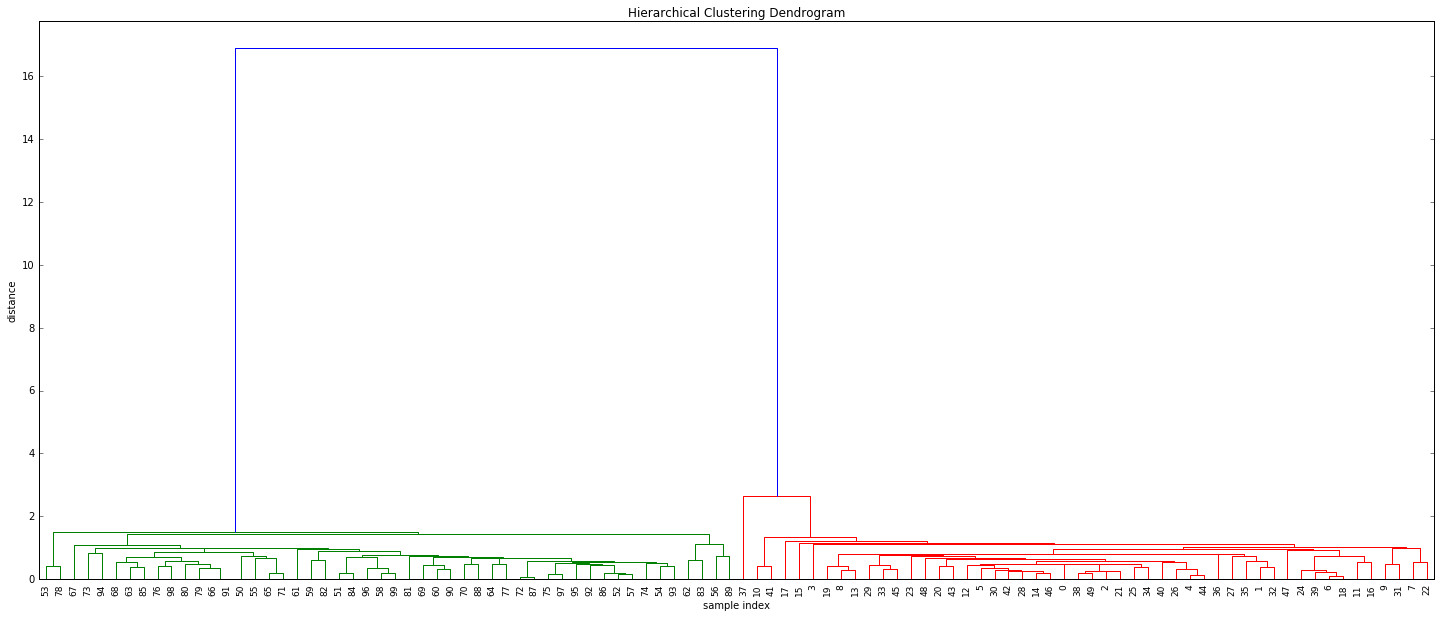

In [6]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=9.,
)
plt.show()

Double click the figure to zoom in.

y-axis tells the distance in each merge (that's why the blue line is "tall")

We can also plot a truncated dendrogram, which only shows part of the tree. For more details please refer to the [scipy page](http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram).

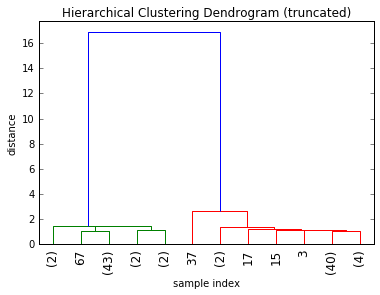

In [7]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters, 
    p=12,  # show only the last p merged clusters
    show_leaf_counts=True,  # numbers with brackets are counts, without brackets are indics
    leaf_rotation=90.,
    leaf_font_size=12.,
)
plt.show()

## Get the Clusters

There are two ways to get the clusters, either given the number of clusters or given the distance threshold.

In [8]:
# given number of clusters k (in our example, k = 2)
k=2
fcluster(Z, k, criterion='maxclust')

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [9]:
# given the distance threshold max_d (it is quite clear from the Dendrogram that 6 is a good threshold)
max_d = 6
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

## Hierarchical Clustering - Complete Linkage

You can try with Complete Linkage by yourself.

In [10]:
Z_complete = linkage(X, 'complete')

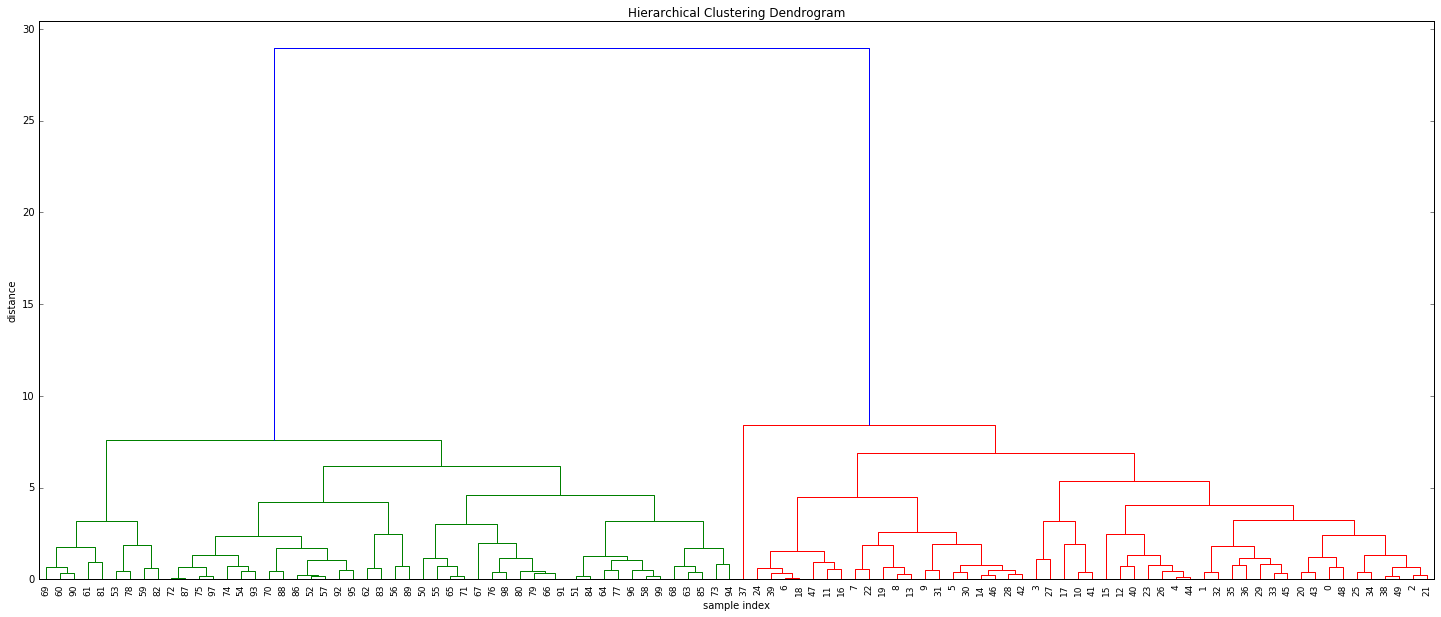

In [11]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z_complete,
    leaf_rotation=90.,
    leaf_font_size=9.,
)
plt.show()